In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_path="city_data.csv"
ride_path="ride_data.csv"

city_reader=pd.read_csv(city_path)
ride_reader=pd.read_csv(ride_path)

In [136]:
city_ride_df=pd.merge(ride_reader, city_reader, on='city', how="outer")

city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,Lake Jonathanshire,4/7/2018 20:51,31.25,4.441250e+12,5,Urban
2,Lake Jonathanshire,3/9/2018 23:45,19.89,2.389500e+12,5,Urban
3,Lake Jonathanshire,4/7/2018 18:09,24.28,7.796810e+12,5,Urban
4,Lake Jonathanshire,1/2/2018 14:14,13.89,4.242550e+11,5,Urban


In [140]:
#city_ride_index=city_ride_df.set_index(['city', 'type'])
#city_ride_index

In [141]:
city_group=city_ride_df.groupby(['city', 'type'])
city_group

In [133]:
avg_fare=city_group.mean()
avg_fare=avg_fare.rename(columns={'fare':"Average_Fare", 'driver_count':"Driver_Count"})
del avg_fare['ride_id']

rides_per_city=city_group.count()
rides_per_city=rides_per_city.rename(columns={'date':"Total_Number_Rides"})
del rides_per_city['fare']
#del rides_per_city['type']
del rides_per_city['driver_count']
del rides_per_city['ride_id']

avg_and_rides=pd.merge(avg_fare, rides_per_city, on=['city','type'])
avg_and_rides.head()

,,Average_Fare,Driver_Count,Total_Number_Rides
city,type,,,
Amandaburgh,Urban,24.641667,12,18
Barajasview,Urban,25.332273,26,22
Barronchester,Suburban,36.422500,11,16
Bethanyland,Suburban,32.956111,22,18
Bradshawfurt,Rural,40.064000,7,10


In [134]:
reset_df=avg_and_rides.reset_index()
#reset_df.head()
genre_df=reset_df[['type', 'Average_Fare', 'Driver_Count', 'Total_Number_Rides']]
genre_df.head()

,type,Average_Fare,Driver_Count,Total_Number_Rides
0,Urban,24.641667,12,18
1,Urban,25.332273,26,22
2,Suburban,36.422500,11,16
3,Suburban,32.956111,22,18
4,Rural,40.064000,7,10


In [35]:
grouped_genre=genre_df.groupby(['type'])
genre_list=list(grouped_genre)
rural_df=genre_list[0][1]
rural_df.head()

,type,Average_Fare,Driver_Count,Total_Number_Rides
4,Rural,40.064000,7,10
17,Rural,24.123333,7,3
20,Rural,33.470000,4,6
24,Rural,36.013333,1,6
33,Rural,34.358333,4,6


In [36]:
suburban_df=genre_list[1][1]
suburban_df.head()

,type,Average_Fare,Driver_Count,Total_Number_Rides
2,Suburban,36.422500,11,16
3,Suburban,32.956111,22,18
5,Suburban,35.437368,10,19
8,Suburban,30.894545,23,22
9,Suburban,31.995882,23,17


In [37]:
urban_df=genre_list[2][1]
urban_df.head()

,type,Average_Fare,Driver_Count,Total_Number_Rides
0,Urban,24.641667,12,18
1,Urban,25.332273,26,22
6,Urban,28.314444,52,27
7,Urban,24.501852,41,27
10,Urban,25.842632,49,19


In [68]:
x_rural=list(rural_df.Total_Number_Rides)
y_rural=list(rural_df.Average_Fare)
s_rural=list(rural_df.Driver_Count**1.70)

#plt.scatter(x_rural, y_rural, marker='o', facecolors="gold", edgecolors="black", s=s_rural)

In [69]:
x_suburban=list(suburban_df.Total_Number_Rides)
y_suburban=list(suburban_df.Average_Fare)
s_suburban=list(suburban_df.Driver_Count**1.70)

#plt.scatter(x_suburban, y_suburban, marker='o', facecolors='lightblue', edgecolors="black", s=s_suburban)

In [70]:
x_urban=list(urban_df.Total_Number_Rides)
y_urban=list(urban_df.Average_Fare)
s_urban=list(urban_df.Driver_Count**1.70)

#plt.scatter(x_urban, y_urban, marker='o', facecolors="coral", edgecolors="black", s=s_urban)

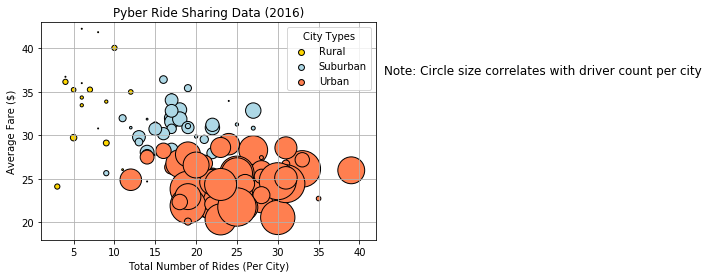

In [110]:
plt.scatter(x_rural, y_rural, marker='o', facecolors="gold", edgecolors="black", s=s_rural)
plt.scatter(x_suburban, y_suburban, marker='o', facecolors='lightblue', edgecolors="black", s=s_suburban)
plt.scatter(x_urban, y_urban, marker='o', facecolors="coral", edgecolors="black", s=s_urban)

plt.ylim(18,43)
plt.xlim(1,42)
plt.grid(True)
plt.text(43,37, 'Note: Circle size correlates with driver count per city', fontsize=12)

#legend=plt.scatter(Urban, Suburban, Rural, loc=1, title='City types')

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
legend=plt.legend(('Rural', 'Suburban', 'Urban'),loc=1, title='City Types')

for handle in legend.legendHandles:
    handle.set_sizes([35.0])

plt.show()

In [111]:
plt.savefig("")
plt.show()

<Figure size 432x288 with 0 Axes>

In [159]:
total_fare_group=city_ride_df.groupby(['type'])
tot_fare=total_fare_group.sum()
tot_fare=tot_fare[('fare')]
tot_fare_df=pd.DataFrame(tot_fare)

#complete_fare_sum=tot_fare_df.sum()
#complete_fare_sum

tot_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [194]:
types=['Rural', 'Suburban', 'Urban']
tot_fare
colors=['gold', 'lightblue', 'salmon']
explode=(0,0,.1)

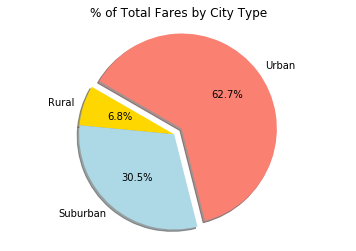

In [222]:
plt.pie(tot_fare, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis("equal")
plt.title('% of Total Fares by City Type')

plt.savefig("")
plt.show()

In [197]:
total_rides_group=rides_per_city.groupby(['type'])
tot_rides=total_rides_group.sum()
tot_rides_list=list(tot_rides.Total_Number_Rides)
tot_rides_list


[125, 625, 1625]

In [198]:
types=['Rural', 'Suburban', 'Urban']
tot_rides_list
colors=['gold', 'lightblue', 'salmon']
explode=(0,0,.1)

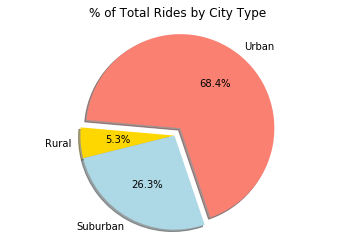

In [221]:
plt.pie(tot_rides_list, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=175)

plt.axis("equal")
plt.title('% of Total Rides by City Type')

plt.savefig("")
plt.show()

In [200]:
driver_per_city=genre_df.groupby('type').sum()
driver_per_city_mod=driver_per_city[('Driver_Count')]
driver_per_city_df=pd.DataFrame(driver_per_city_mod)
driver_per_city_df

,Driver_Count
type,
Rural,78
Suburban,490
Urban,2405


In [210]:
types=['Rural', 'Suburban', 'Urban']
driver_per_city_mod
colors=['gold', 'lightblue', 'salmon']
explode=(0,0,.1)

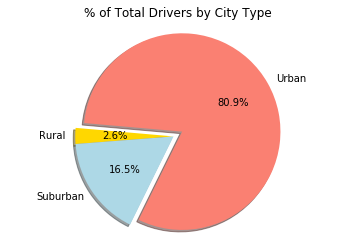

In [220]:
plt.pie(driver_per_city_mod, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=175)

plt.axis("equal")
plt.title('% of Total Drivers by City Type')

plt.savefig("")
plt.show()